In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
cpus = pd.read_csv("cpus.csv", delimiter=";")

In [4]:
#a. Which  columns  do  you  need  to  remove in order  to  perform  a  Principal  Component  Analysis?  Remove any columns with the wrong scale, columns that do not make sense, ....
cpusCorrect = cpus.drop(["name"], axis=1)

In [7]:
#b. Look  at  the  correlations  between  the  variables.  Is  the  data  usable for Principal  Component Analysis?
correlations = cpusCorrect.corr(method='kendall')
# print(correlations)

Explained variance in %: [0.63259623 0.10696087 0.10302302 0.0667937  0.0523419  0.02182675
 0.01308745 0.00337008]


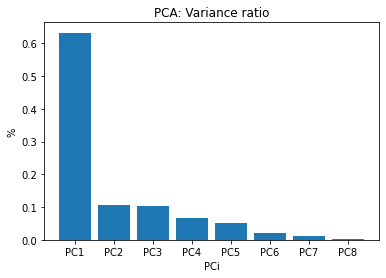

In [10]:
#c. Perform a Principal Component Analysis and interpret the results
cpusZ =pd.DataFrame()
for column in cpusCorrect:
	mean = cpusCorrect[column].mean()
	standev = cpusCorrect[column].std()
	cpusZ[column] = (cpusCorrect[column] - mean)/standev
cpusZ.index= cpusCorrect.index.values
pca_dim = min(cpusZ.shape[1], cpusZ.shape[0])
pcamodel = PCA(pca_dim)
principalComponents = pcamodel.fit_transform(cpusZ)
print('Explained variance in %:', pcamodel.explained_variance_ratio_)

def putIntoBarChart():
	labels_bar = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
	plt.figure()
	plt.bar(labels_bar, pcamodel.explained_variance_ratio_)

	plt.title('PCA: Variance ratio')
	plt.xlabel('PCi')
	plt.ylabel('%')
	plt.show()

putIntoBarChart()

In [11]:
#d. Are there one or more variables that weigh heavily in determining the first Principal Component? If so, which ones?

row_labels = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
aij=pd.DataFrame(data=pcamodel.components_,	columns = cpusCorrect.columns, index = row_labels)

print(aij)

         syct      mmin      mmax      cach     chmin     chmax      perf  \
PC1 -0.198791  0.364847  0.399053  0.336254  0.331495  0.297704  0.420988   
PC2  0.916296  0.170859  0.106722 -0.094997 -0.111905 -0.101663  0.192075   
PC3  0.290452 -0.487833 -0.198665  0.199472  0.343205  0.683140 -0.065989   
PC4 -0.138396 -0.145534  0.304876 -0.634908 -0.437152  0.482625  0.133134   
PC5  0.019832  0.127541  0.066404 -0.631699  0.743737 -0.106508 -0.107464   
PC6 -0.022395  0.639887 -0.658019 -0.121283 -0.101343  0.357229  0.037941   
PC7 -0.119701 -0.384236 -0.477340 -0.145419  0.072658 -0.248978  0.652695   
PC8 -0.046309 -0.071918 -0.178038 -0.010546  0.001522 -0.021987 -0.569910   

      estperf  
PC1  0.423451  
PC2  0.225929  
PC3 -0.097850  
PC4  0.147834  
PC5 -0.062048  
PC6 -0.054961  
PC7  0.309441  
PC8  0.797240  


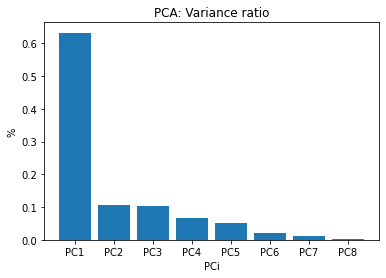

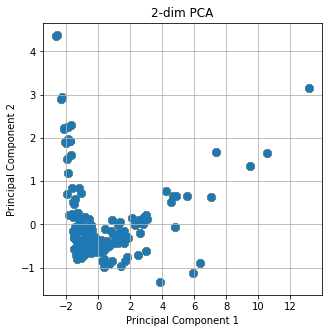

In [12]:
#e. Visualise theexplainedvariance and make abiplot(PC1 and PC2
def putIntoBarChart():
	labels_bar = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
	plt.figure()
	plt.bar(labels_bar, pcamodel.explained_variance_ratio_)

	plt.title('PCA: Variance ratio')
	plt.xlabel('PCi')
	plt.ylabel('%')
	plt.show()

def showBiPlot():
	putIntoBarChart()
	principalDf= pd.DataFrame()
	principalDf['PC1'] = principalComponents[:,0]
	principalDf['PC2'] = principalComponents[:,1]
	fig, ax = plt.subplots(figsize=(5, 5))
	ax.set_xlabel('Principal Component 1')
	ax.set_ylabel('Principal Component 2')
	ax.set_title('2-dim PCA')
	markers = list(matplotlib.markers.MarkerStyle.markers.keys())
	for m in zip(markers):
		ax.scatter(principalDf['PC1'], principalDf['PC2'], s = 50)
	ax.grid(True)
	plt.show()

showBiPlot()

In [ ]:
#f. Based on the graph with theexplainedvariance, how many main components would you hold back when 'reducing' the dataset?
# First 3, because they're the biggest